<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/GasDischargeMajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour, from a gas turbine located in Turkey for the purpose of studying flue gas emissions, namely CO and NOx.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant and used for predicting hourly net energy yield.Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. The dataset can be well used for predicting turbine energy yield (TEY) using ambient variables as features.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report,accuracy_score

In [58]:
df1=pd.read_csv("/content/gt_2011.csv")
df2=pd.read_csv("/content/gt_2012.csv")
df3=pd.read_csv("/content/gt_2013.csv")
df4=pd.read_csv("/content/gt_2014.csv")
df5=pd.read_csv("/content/gt_2015.csv")

In [59]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0,ignore_index=True)
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [60]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'AP'}>,
        <Axes: title={'center': 'AH'}>],
       [<Axes: title={'center': 'AFDP'}>,
        <Axes: title={'center': 'GTEP'}>,
        <Axes: title={'center': 'TIT'}>],
       [<Axes: title={'center': 'TAT'}>, <Axes: title={'center': 'TEY'}>,
        <Axes: title={'center': 'CDP'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'NOX'}>,
        <Axes: >]], dtype=object)

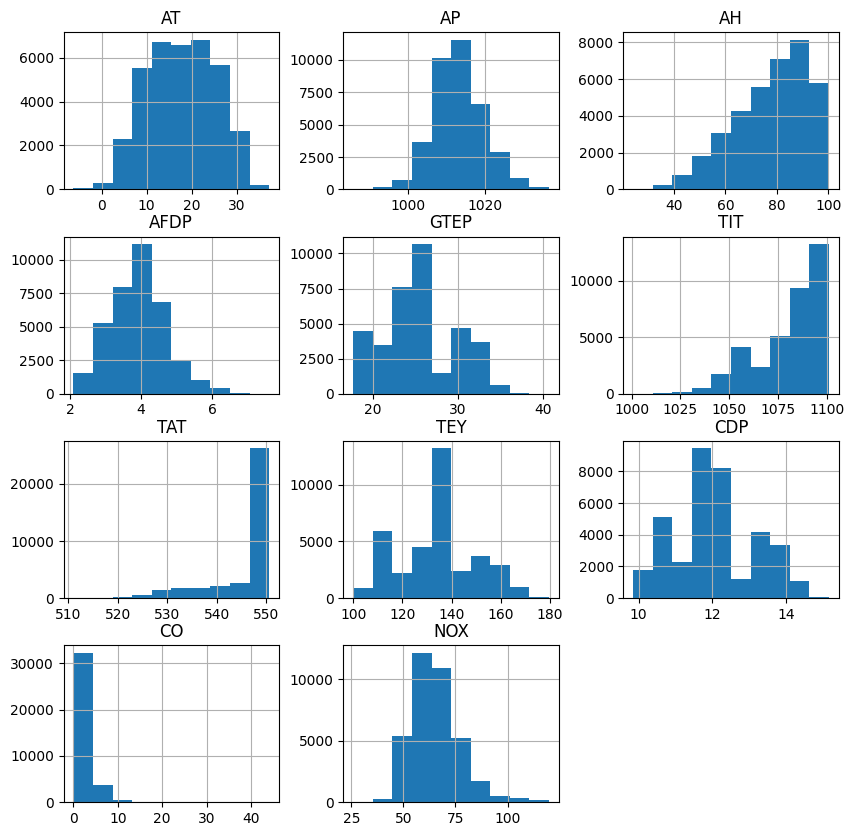

In [63]:
df.hist(figsize = (10,10))

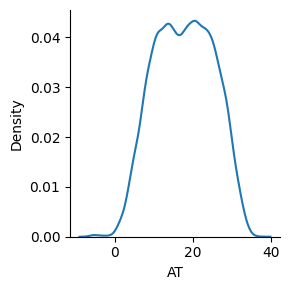

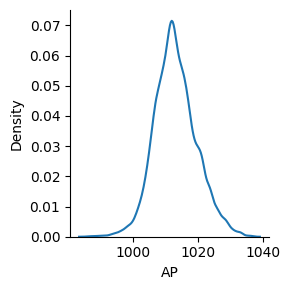

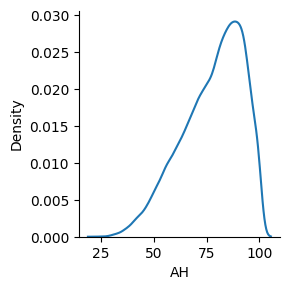

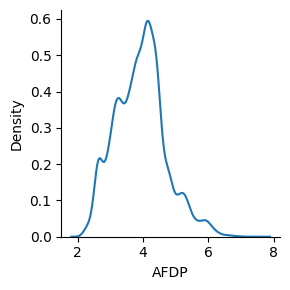

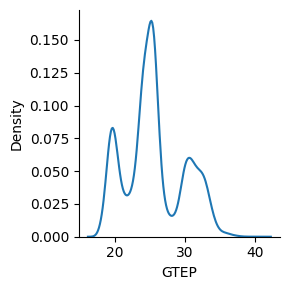

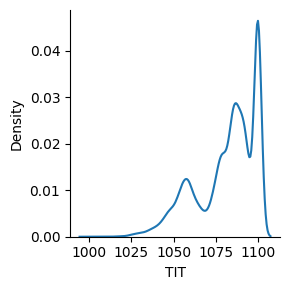

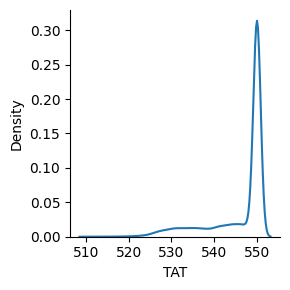

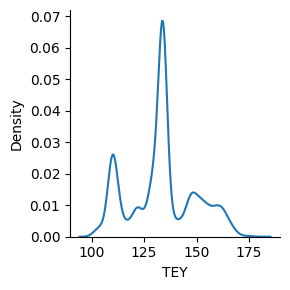

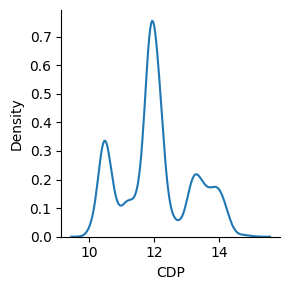

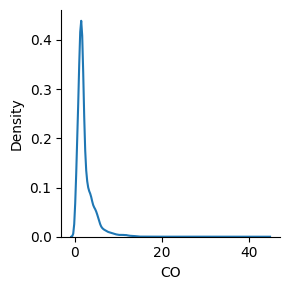

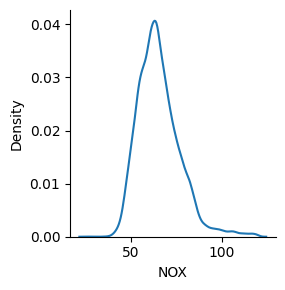

In [64]:
df_columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO','NOX']
for i in df_columns:
  g = sns.FacetGrid(df)
  g = g.map(sns.kdeplot, i)

In [65]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

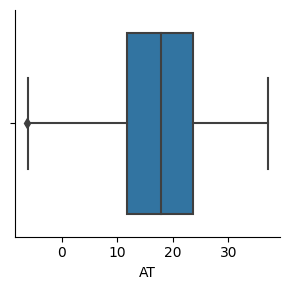

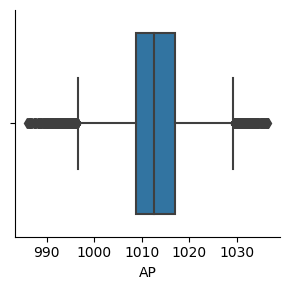

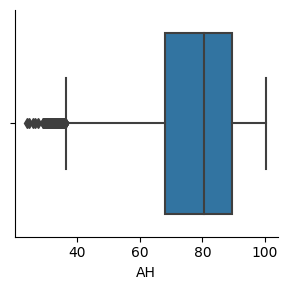

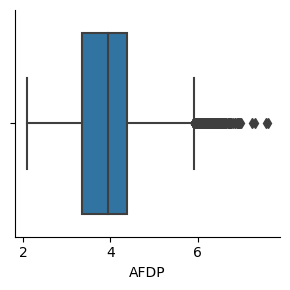

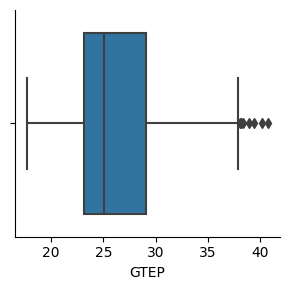

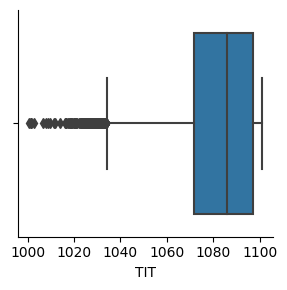

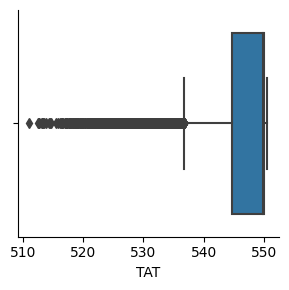

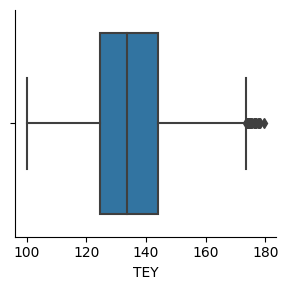

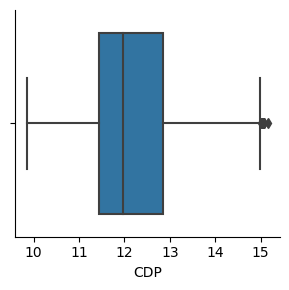

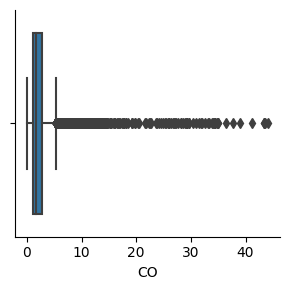

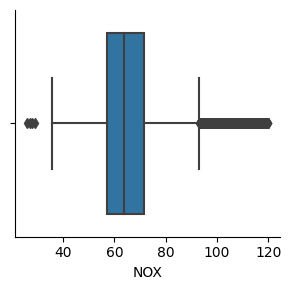

In [66]:
# plt.figure(figsize=(10, 8))
# sns.boxplot(df)

df_columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO','NOX']
for i in df_columns:
  g = sns.FacetGrid(df)
  g = g.map(sns.boxplot, i)

In [67]:
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
outlier_indices = (abs_z_scores > 3).any(axis=1) #threshold=3


In [68]:
df_cleaned = df[~outlier_indices]

In [69]:
df_cleaned.shape

(35058, 11)

Text(0.5, 1.0, 'Heatmap')

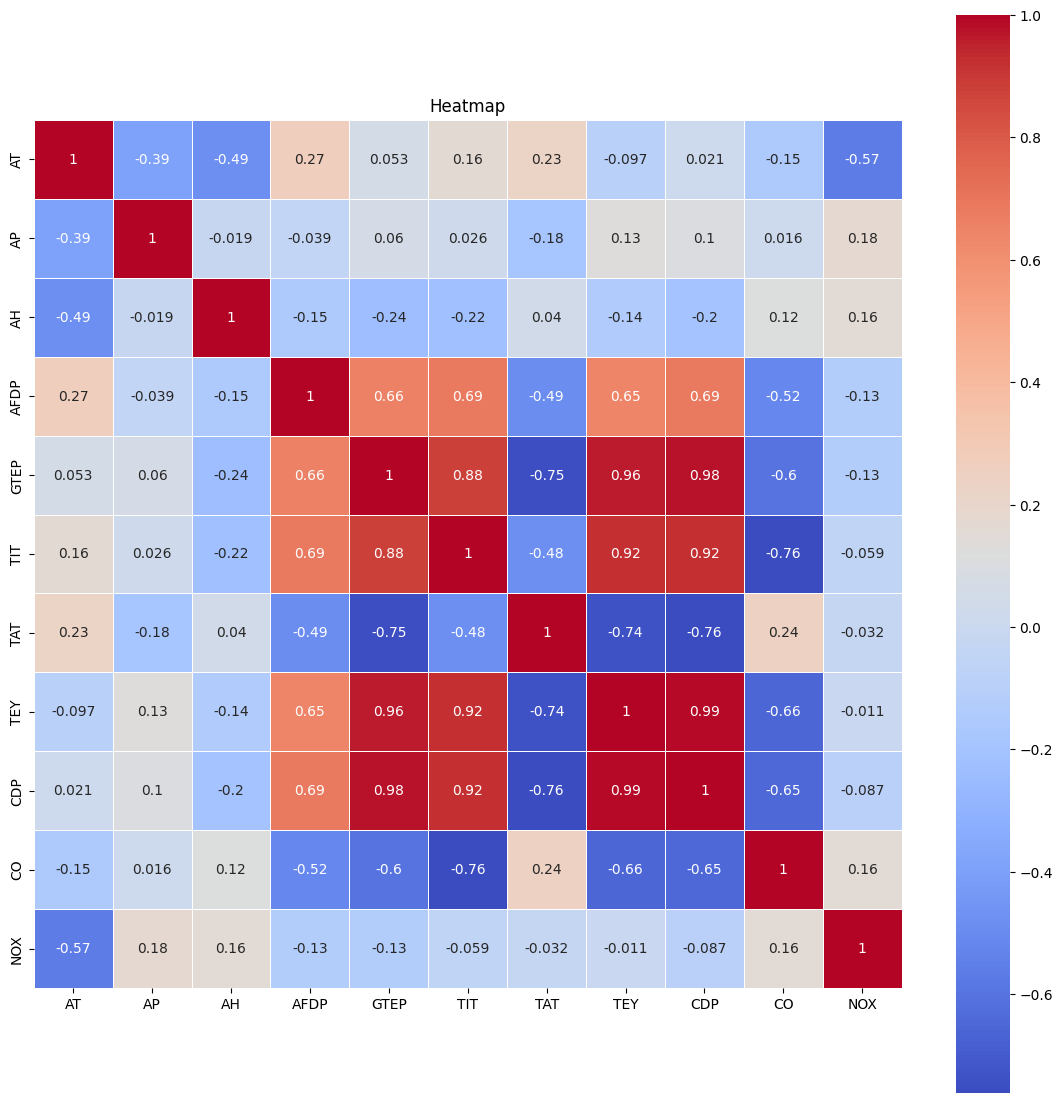

In [70]:
fig, ax=plt.subplots(figsize=(14,14))
sns.heatmap(df_cleaned.corr(),cmap="coolwarm",square=True,annot=True,linewidths=0.5)
plt.title("Heatmap")


* Strong correlation between AFDP,GTEP,TITTEY&CDP
* NOX shows least correlation

In [71]:
# sns.pairplot(df_cleaned)

**Visualizing the Specific Distributions from Pairplot findings**

<Axes: xlabel='TEY', ylabel='CDP'>

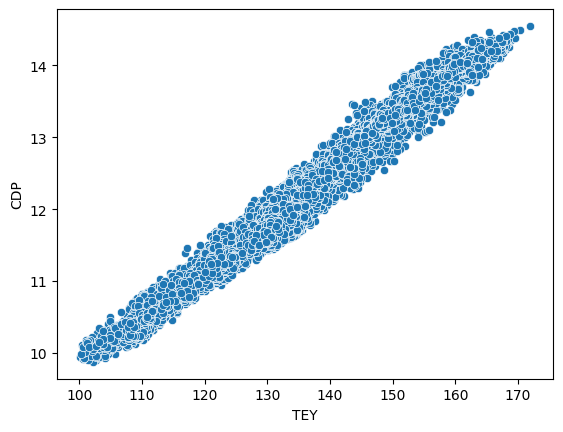

In [72]:
sns.scatterplot(df_cleaned,x ='TEY',y ='CDP', palette = 'coolwarm')

In [73]:
X=df_cleaned

In [74]:
#we have to find out that how many clusters are required
from sklearn.cluster import KMeans
wcss=[]  #IS FOR APPPENDING VALUE OF VARIANCE WHEN I CHANGING
for i in range(1,11): #i=number of cluster
  data=KMeans(n_clusters=i,init="k-means++",random_state=42)#init:initialisation
  data.fit(X)         #UNSUPERVISEDIL INPUT MATRAME ULLU
  wcss.append(data.inertia_)

In [75]:
print(wcss)

[33440795.696302682, 21280268.88042335, 16263687.173348207, 12583530.62356741, 11346452.227347378, 10297678.25618162, 9302851.599670568, 8516980.365914738, 8018072.07844703, 7548609.579634408]


In [76]:
len(wcss)

10

Text(0, 0.5, 'Variance')

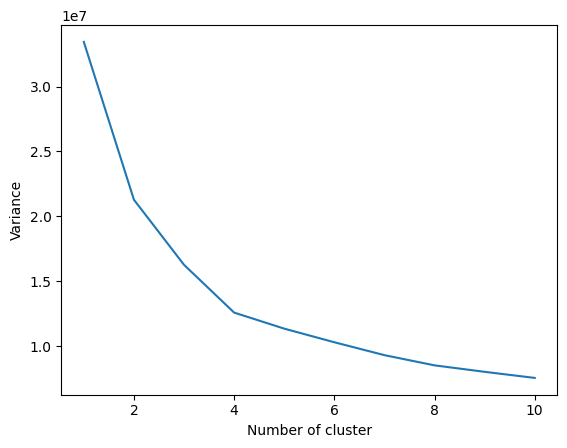

In [77]:
lst=[i for i in range(1,11)]
plt.plot(lst,wcss)
#plt.plot(range(1,11),wcss) #we can also use this code instead of list comprehension
plt.xlabel("Number of cluster")
plt.ylabel("Variance")

In [78]:
data1=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_data=data1.fit_predict(X) #PASSING BOTH FIT AND PREDICT IN ONE LINE
y_data

array([2, 2, 2, ..., 2, 3, 2], dtype=int32)

In [79]:
X['cluster']=y_data
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2
...,...,...,...,...,...,...,...,...,...,...,...,...
36724,4.3528,1029.2,87.147,4.9960,34.094,1100.0,527.73,167.04,14.378,1.76180,47.370,0
36725,3.7675,1029.0,89.609,5.0733,33.402,1099.8,529.82,165.78,14.205,1.93560,47.819,0
36726,3.4218,1028.7,91.003,3.6911,22.859,1073.5,549.78,129.86,11.549,3.67380,67.737,2
36727,3.3776,1028.5,92.703,3.3128,20.248,1057.6,550.30,117.46,10.783,5.34880,66.550,3


In [80]:
X.columns.unique()

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX', 'cluster'],
      dtype='object')

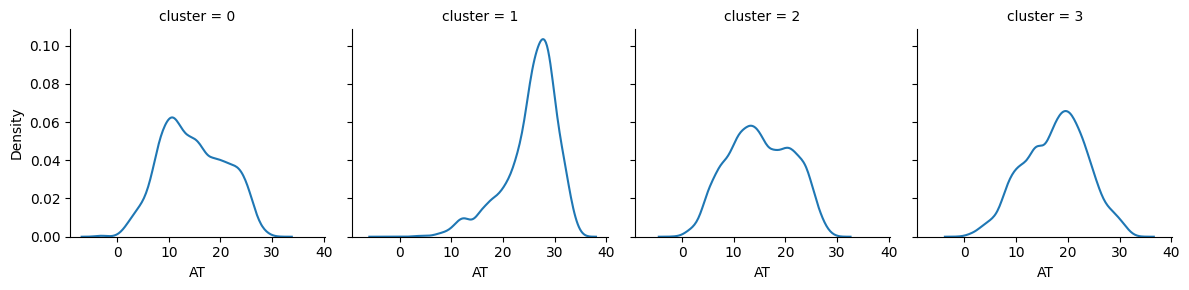

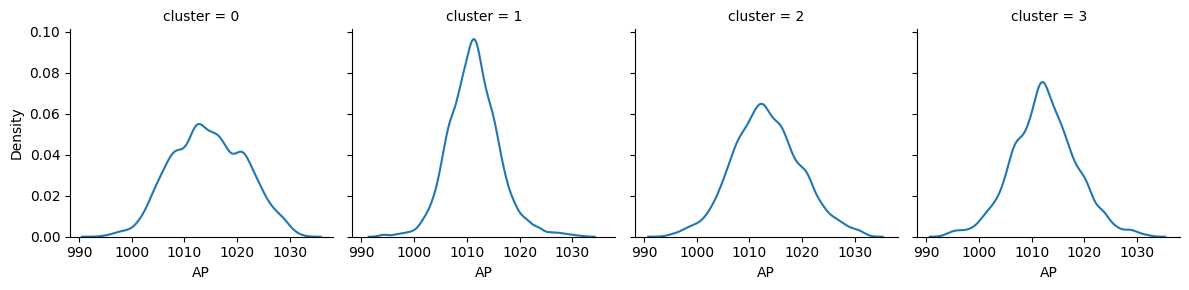

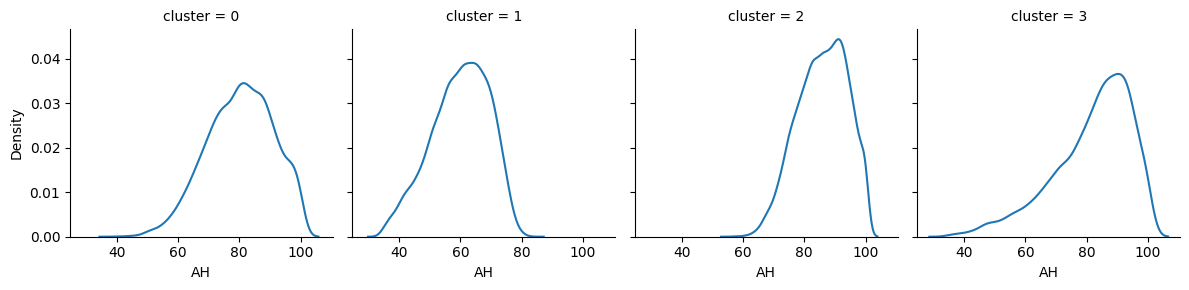

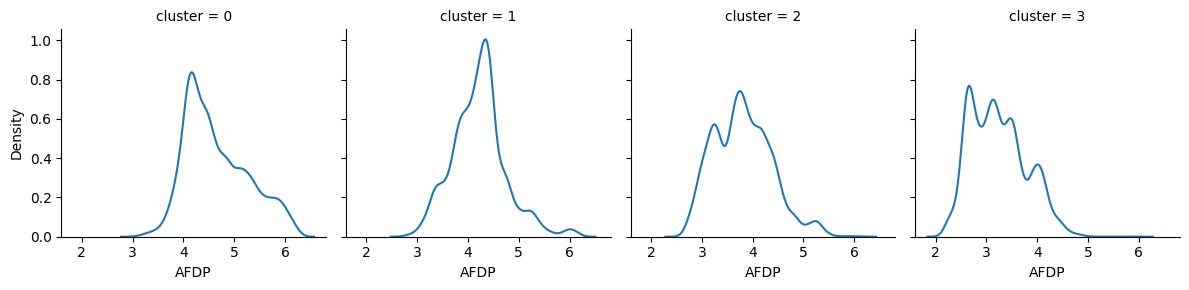

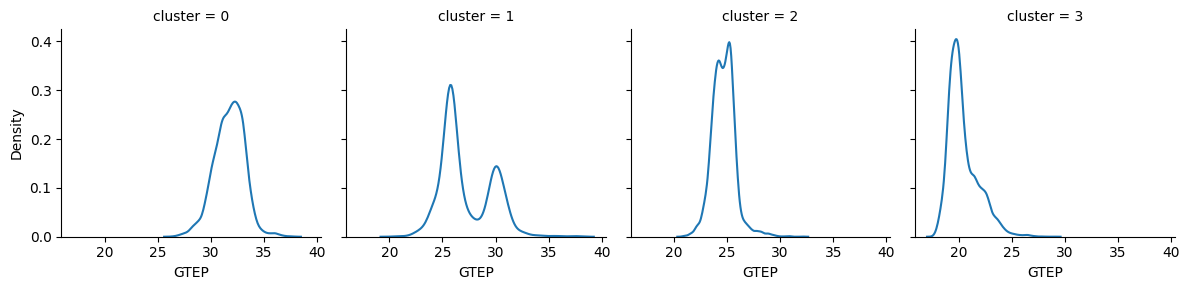

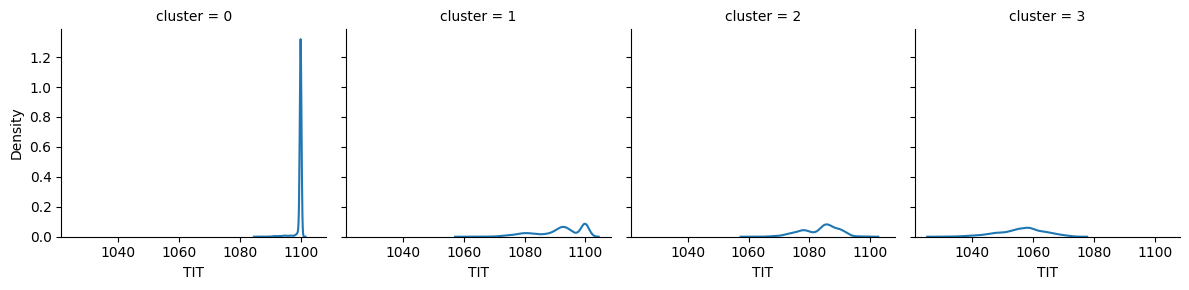

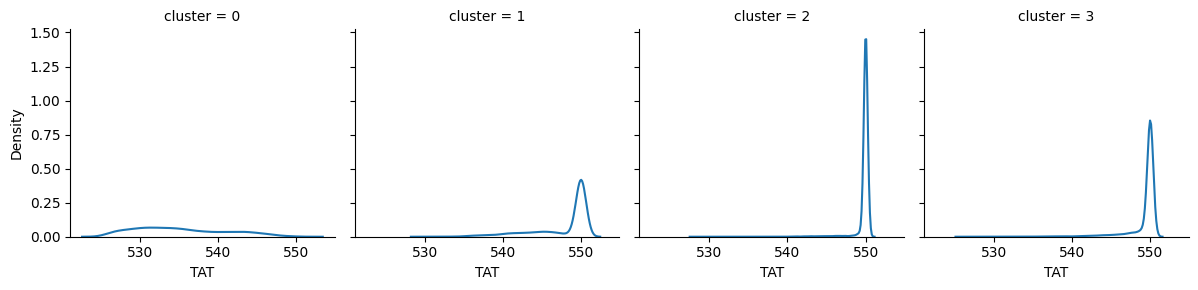

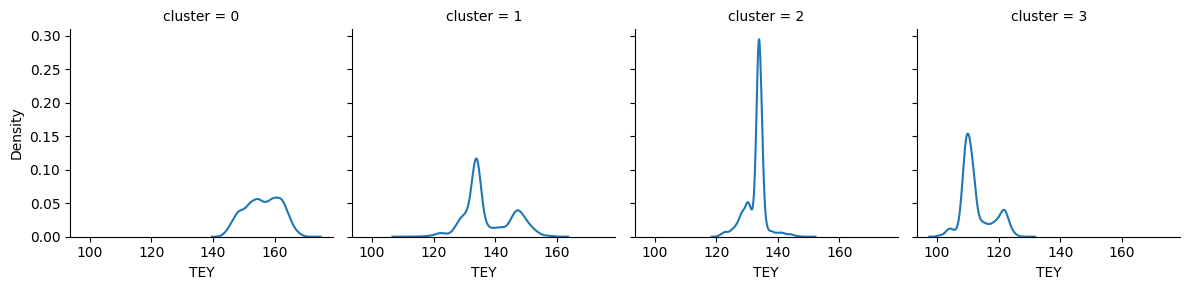

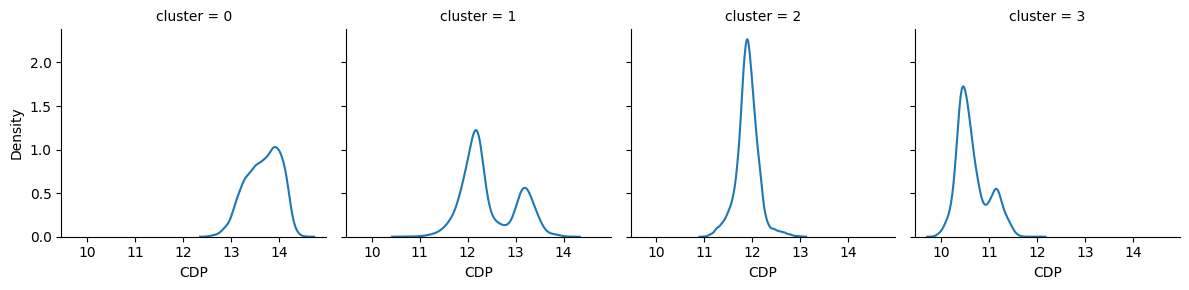

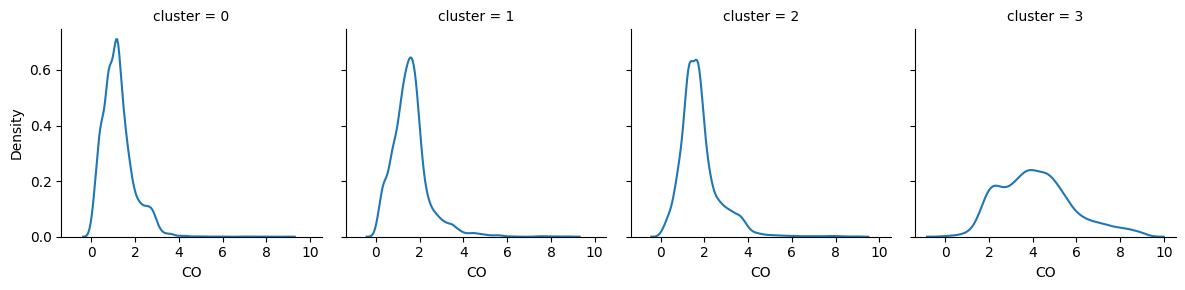

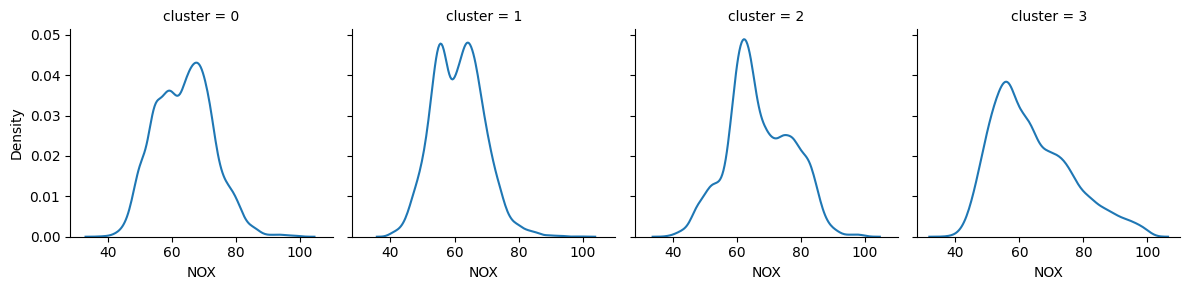

In [81]:
df_columns=['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO','NOX']
for i in df_columns:
  g = sns.FacetGrid(X,col='cluster')
  g = g.map(sns.kdeplot, i)


In [82]:
x=X.iloc[:,:-1].values
x

array([[4.5878e+00, 1.0187e+03, 8.3675e+01, ..., 1.1898e+01, 3.2663e-01,
        8.1952e+01],
       [4.2932e+00, 1.0183e+03, 8.4235e+01, ..., 1.1892e+01, 4.4784e-01,
        8.2377e+01],
       [3.9045e+00, 1.0184e+03, 8.4858e+01, ..., 1.2042e+01, 4.5144e-01,
        8.3776e+01],
       ...,
       [3.4218e+00, 1.0287e+03, 9.1003e+01, ..., 1.1549e+01, 3.6738e+00,
        6.7737e+01],
       [3.3776e+00, 1.0285e+03, 9.2703e+01, ..., 1.0783e+01, 5.3488e+00,
        6.6550e+01],
       [5.8837e+00, 1.0287e+03, 9.4200e+01, ..., 1.1771e+01, 3.3134e+00,
        6.4738e+01]])

In [83]:
y=X.iloc[:,-1].values
y

array([2, 2, 2, ..., 2, 3, 2], dtype=int32)

In [95]:
svm_classifier = SVC()
svm_param_grid = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_classifier, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X, y)
print("Support Vector Machine - Best hyperparameters:", svm_grid_search.best_params_)

Support Vector Machine - Best hyperparameters: {'C': 0.1, 'kernel': 'linear'}


In [96]:
dt_classifier = DecisionTreeClassifier()
dt_param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X, y)
print("Decision Tree - Best hyperparameters:", dt_grid_search.best_params_)

Decision Tree - Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [98]:
# adaboost_classifier = AdaBoostClassifier()
# adaboost_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0]
# }
# adaboost_grid_search = GridSearchCV(adaboost_classifier, param_grid=adaboost_param_grid, cv=5)
# adaboost_grid_search.fit(X, y)
# print("AdaBoost - Best hyperparameters:", adaboost_grid_search.best_params_)

In [99]:
# xgb_classifier = XGBClassifier()
# xgb_param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.3]
# }
# xgb_grid_search = GridSearchCV(xgb_classifier, param_grid=xgb_param_grid, cv=5)
# xgb_grid_search.fit(X, y)
# print("XGBoost - Best hyperparameters:", xgb_grid_search.best_params_)

In [94]:
rf_classifier = RandomForestClassifier()

# Define the parameter grid for Grid Search
param_grid = {'n_estimators': [10,20,30],'max_depth': [None,5,10,20]}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'n_estimators': 10}
Best cross-validation score: 1.0


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((24540, 11), (10518, 11))

In [25]:
y_train.shape,y_test.shape

((24540,), (10518,))

In [26]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
# from sklearn.tree import DecisionTreeClassifier
# dtc=DecisionTreeClassifier(criterion="entropy")
# dtc.fit(x_train,y_train)
# y_pred=dtc.predict(x_test)
# y_pred

array([0, 2, 3, ..., 0, 0, 4], dtype=int32)

In [28]:
# from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# print(accuracy_score(y_test,y_pred))

0.968625213918996


In [30]:

base = GaussianNB()
svm = SVC()
dec = DecisionTreeClassifier(criterion="entropy")
rfc = RandomForestClassifier(n_estimators=10,random_state=42)
xgb = XGBClassifier()
adb = AdaBoostClassifier(n_estimators=50, random_state=42)
lst_model = [knn,base,svm,dec,rfc,xgb,adb]

KNeighborsClassifier(n_neighbors=7)
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2235
           1       0.94      0.94      0.94      2436
           2       0.97      0.98      0.97      1828
           3       0.95      0.94      0.95      2257
           4       0.95      0.94      0.95      1762

    accuracy                           0.96     10518
   macro avg       0.96      0.96      0.96     10518
weighted avg       0.96      0.96      0.96     10518

Accuracy score of KNeighborsClassifier(n_neighbors=7)   0.955980224377258
GaussianNB()
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2235
           1       0.79      0.91      0.85      2436
           2       0.88      0.96      0.92      1828
           3       

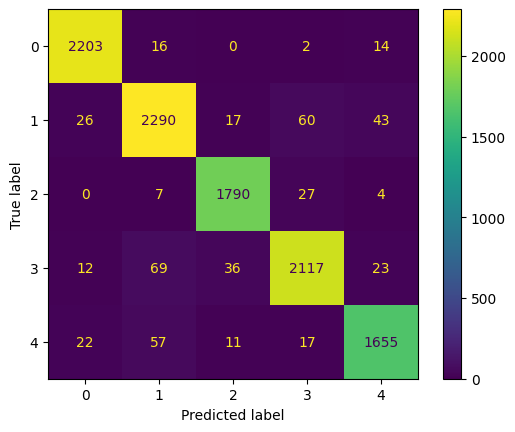

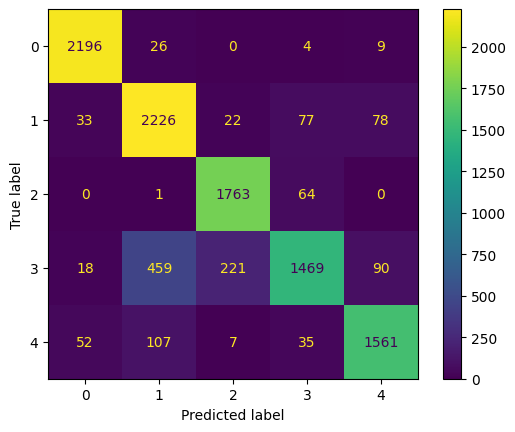

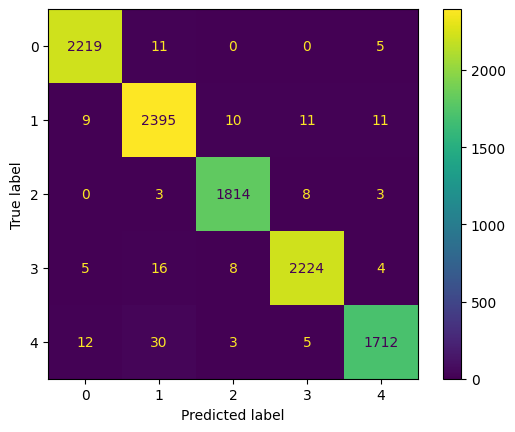

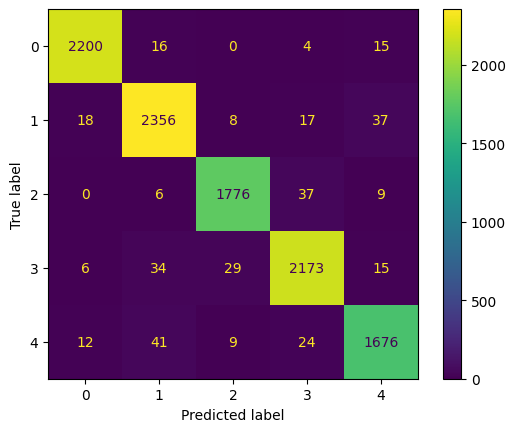

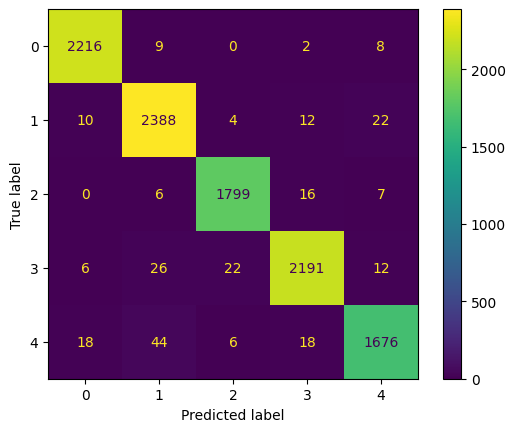

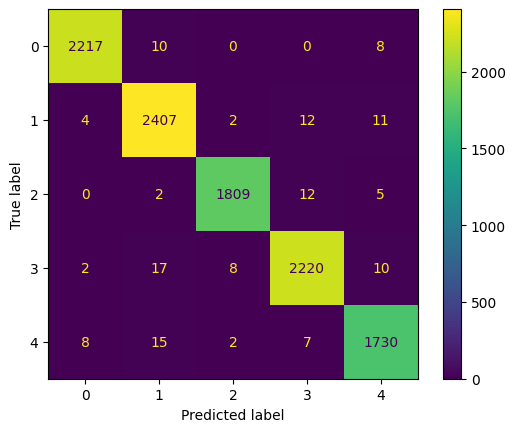

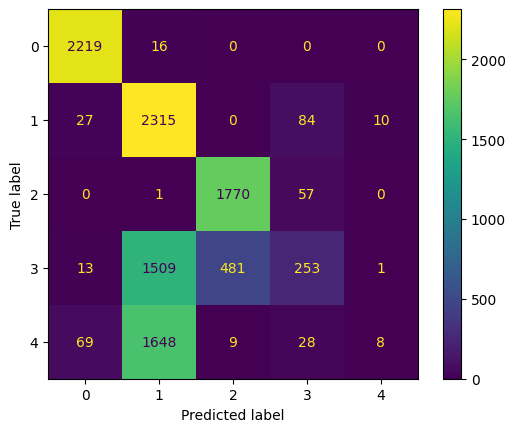

In [33]:
for i in lst_model:
    print(i)
    print("-"*75)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("Accuracy score of",i," ",accuracy_score(y_test,y_pred))
    labels=[0,1,2,3,4]
    result=confusion_matrix(y_test,y_pred)
    cmd=ConfusionMatrixDisplay(result,display_labels=labels)
    cmd.plot()